# Regression Project for Marketing Outcome Prediction

## Project Overview

Most companies invest in various marketing mediums such as television advertisements, social media and influencers, and radio promotions to attract customers and advertise products. With the advent of digital marketing and the ubiquitous availability of information, data analysis is becoming increasingly important.

### Objective

In this project, we will use the advertising and sales dataset available on Kaggle to predict the sales resulting from expenditure towards various marketing mediums. By leveraging regression techniques, we aim to:

1. Predict sales based on different marketing expenditures.
2. Draw insights on which marketing mediums have the highest impact on sales.
3. Implement cross-validation to avoid overfitting and underfitting.

## Steps to Follow

1. **Data Exploration**: Load and explore the dataset to understand its structure and contents.
2. **Data Preprocessing**: Clean and preprocess the data to prepare it for modeling.
3. **Feature Selection**: Select relevant features that influence sales.
4. **Model Training**: Train a regression model to predict sales based on marketing expenditures.
5. **Model Evaluation**: Evaluate the model's performance using cross-validation techniques.
6. **Insights and Interpretation**: Analyze the results to determine which marketing mediums have the highest impact on sales.

## Tools and Libraries

- **Python**: The primary programming language.
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Scikit-learn**: For machine learning and regression models.
- **Matplotlib/Seaborn**: For data visualization.
- **Dataset**: [Marketing and Sales Data](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

---

Let's dive into the data and begin our journey to uncover actionable marketing insights!


In [4]:
#Installs
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Data Exploration
df = pd.read_csv("Dummy Data HSS.csv")
df.head(9)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400


In [7]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


The dependant variable Sales has fewer values than the other variables. We need to do some transformations to the dataframe for achieve that all the varibales has equal lenght before start training.

In [8]:
df = df.dropna(axis=0)
min_count = df.notna().sum().min()
df = df.apply(lambda col: col.dropna().iloc[:min_count])
df = df.reset_index(drop=True)
df.describe()
#Now the variables has the same lenght

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [9]:
#Codification of the categorical variable Influencer
influ_map = {}
categories = df['Influencer'].unique()
values = [i for i in range(1, len(categories) + 1)]
values.reverse()

for influ_category, value in zip(categories, values):
    influ_map[influ_category] = value

print(influ_map)
df["Influencer key"] = df["Influencer"].map(influ_map)

{'Mega': 4, 'Micro': 3, 'Nano': 2, 'Macro': 1}


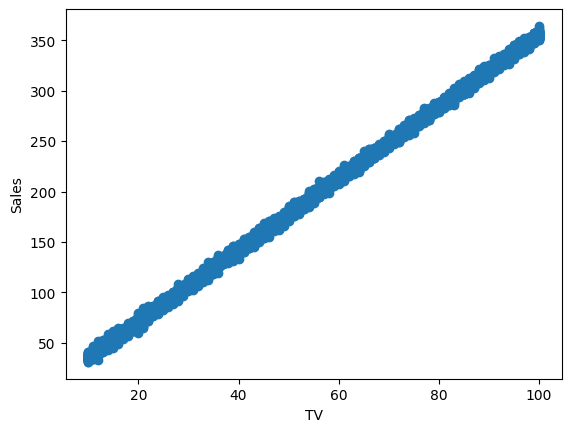

In [10]:
#Visual exploration of the relationship between sales and the rest of the variables
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

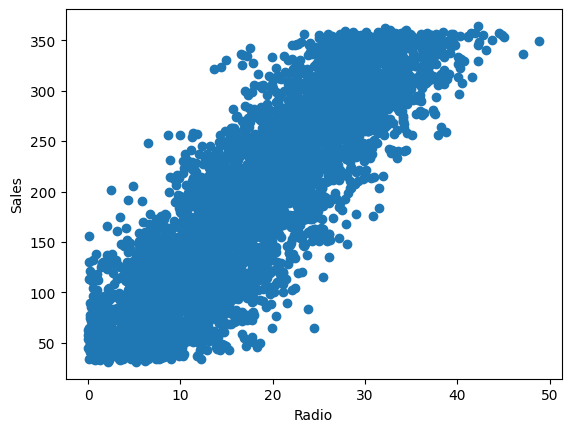

In [11]:
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

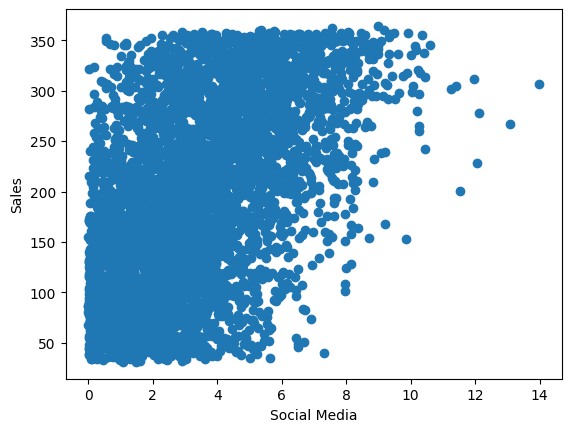

In [12]:
plt.scatter(df["Social Media"], df["Sales"])
plt.xlabel("Social Media")
plt.ylabel("Sales")
plt.show()

TV and Radio variables has clearly a linear relationship with Sales. Not so clear in the case in the case of Social Media. Lets do K-Folds Cross Validation to know if include Social Media and influencer in the model.

In [13]:
#implementing K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

def cross_validation_measures(model, X, y, cv):
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    print('R2: %.3f ,\nStandard Deviations :%.3f\n' %
      (np.mean(scores), np.std(scores)))

reg = LinearRegression()
cv = KFold(5, shuffle=True)
X1 = np.asanyarray(df[['TV']])
X2 = np.asanyarray(df[['Radio']])
X3 = np.asanyarray(df[['TV', 'Radio']])
X4 = np.asanyarray(df[['Social Media']])
X5 = np.asanyarray(df[['TV', 'Radio', 'Social Media']])
X6 = np.asanyarray(df[['TV', 'Radio', 'Influencer key']])
X7 = np.asanyarray(df[['TV', 'Radio', 'Influencer key', 'Social Media']])
X8 = np.asanyarray(df[['Radio', 'Social Media']])
X9 = np.asanyarray(df[['Radio', 'Social Media', 'Influencer key']])
X10 = np.asanyarray(df[['Influencer key']])
training_sets = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10]

y = np.asanyarray(df[['Sales']])

for X, index in zip(training_sets, range(1, len(training_sets) +1)):
    print(f"Training set {index} Measures:")
    cross_validation_measures(reg, X, y, cv)


Training set 1 Measures:
R2: 0.999 ,
Standard Deviations :0.000

Training set 2 Measures:
R2: 0.754 ,
Standard Deviations :0.015

Training set 3 Measures:
R2: 0.999 ,
Standard Deviations :0.000

Training set 4 Measures:
R2: 0.276 ,
Standard Deviations :0.029

Training set 5 Measures:
R2: 0.999 ,
Standard Deviations :0.000

Training set 6 Measures:
R2: 0.999 ,
Standard Deviations :0.000

Training set 7 Measures:
R2: 0.999 ,
Standard Deviations :0.000

Training set 8 Measures:
R2: 0.754 ,
Standard Deviations :0.011

Training set 9 Measures:
R2: 0.754 ,
Standard Deviations :0.012

Training set 10 Measures:
R2: -0.002 ,
Standard Deviations :0.003



The variables "Influencer" and "Social Media" have little impact on the prediction since the R² measure does not increase when they are included in the model. Conversely, "Radio" and "TV" provide good results. With just "TV", the model offers an almost perfect result, likely due to the high correlation between the variables "TV" and "Sales," as shown by the scatter plot where the linear relationship between these two variables is evident. It is decided to include "Radio" in the model as a backup in case "TV" data is missing, given that "Radio" alone achieves good metrics.

In [14]:
#Training
X_train = np.asanyarray(df[['TV', 'Radio']])
y_train = np.asanyarray(df[['Sales']])

reg.fit(X_train, y_train)

print("Coefficients: ", reg.coef_)

Coefficients:  [[ 3.56257080e+00 -3.28439361e-03]]


Looking at the coefficients, it's clear that the TV variable has the most significant impact on sales.

In [15]:
#Saving the model for deploy
import pickle
import os

with open(os.path.join(os.getcwd(), 'model_checkpoint', 'lr_model.pkl'), 'wb') as file:
    pickle.dump(reg, file)